<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
# Exploratory Data Analysis Project

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Initail Observation](#section302)<br/>
    - 3.3 [Pre Profiling](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)<br/>
5. [Conclusion](#section5)


 ### 1. Problem Statement


Aim is to study average 5-year survival rate of patients who had undergone surgery for breast cancer during the period 1958- 1969 .
 
Breast Cancer patients can be classifyied as either patients are suffering by Benign & Malignant.

 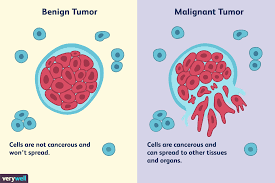

### 2. Data Loading and Description

In [2]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline                                                 
sns.set()

from subprocess import check_output

BCD_df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv")
BCD_df.head(4) 

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1


## 3. Data Profiling

### 3.1 Understanding the Dataset

In [3]:
BCD_df.shape    # shape of the dataset having Row=306 & Column = 4

(306, 4)

In [4]:
BCD_df.head()                # top rows of dataset

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
BCD_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
Years_of_operation,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
Pos_axillary_nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
Status,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


In [6]:
BCD_df.columns

Index(['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status'], dtype='object')

In [7]:
BCD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


## 3.2 Initial Observation

|-----------------------------------------------|------------------------------------------------------------------|
|      Observations	                            |              Conclusions                                         |
|-----------------------------------------------|------------------------------------------------------------------|
|306 entries ranging from 0 to 305	            |There are only 306 rows in the dataset, which mayn't be sufficient| |                                               | enough to come |to a conclusion.                                 |
|-----------------------------------------------|------------------------------------------------------------------|
|There are 4 columns, 3 describing the          |The dimensionality of the |datapoints is small, 3-D data. Hence,  |
|datapoint & 1 describes the status of survival.|analyzing with pair-plots will be good.                           |
|-----------------------------------------------|------------------------------------------------------------------|
|Each column has 306 non-null values	        |There are no missing values in this dataset.                      |
|-----------------------------------------------|------------------------------------------------------------------|
|Status column has only two possible values(1&2)|We can change Status column 1 = "Yes" & 2 = " No".                |
|-----------------------------------------------|------------------------------------------------------------------|
|Status Column  has int64 data type.        	|It should be re-mapped to create co-relationship with dataset.    |
|-----------------------------------------------|------------------------------------------------------------------|
|Remaining all columns have int64 datatype.	    |The dataset is purely numerical.So a rigourous numerical analysis | |                                               |needs to be done.                                                 |
|-----------------------------------------------|------------------------------------------------------------------|


#### How balanced is the dataset ?

In [8]:
BCD_df['Status'].value_counts(normalize=True)

1    0.735294
2    0.264706
Name: Status, dtype: float64

In [9]:
BCD_df['Status'].unique()

array([1, 2], dtype=int64)

In [10]:
colors = {1: 'green', 2: 'red'}

Text(0.5, 1.0, 'Bar Plot For Status')

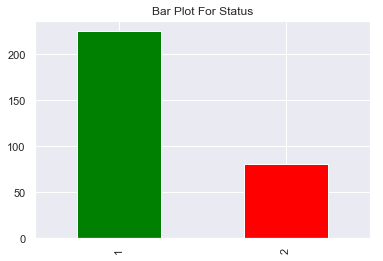

In [11]:
BCD_df.Status.value_counts().plot.bar(color =['green', 'red'])
plt.title('Bar Plot For Status')

From the above graph shows surival rates during the period 1958 - 1969.

### 3.3 Pre Profiling

First install pandas profiling  with below command.

In [13]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [12]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(BCD_df)
profile.to_file(outputfile="BCD_df_before_preprocessing.html")

Here, we have done pandas profiling before preprocessing of dataset as BCD_before_preprocessing.html.

#### Dataset Observation <br/>
Number of variables    : 4 <br/>
Number of observations :306 <br/>
Total Missing (%)      :0.0% <br/>
Total size in memory   :9.6 KiB <br/>
 
##Variables types <br/>
Numeric                :3<br/> 
Boolean                :1 <br/>

- The age of the patients vary from 30 to 83 with the median of 52 & Standard deviation 10.8. 
- Maximum number of Pos_axillary_nodes observed is 52, nearly 75% of the patients have less than 5 Pos_axillary_nodes   and nearly 25% of the patients have no Pos_axillary_nodes.
- The data set contains only a small number of records (306).
- The Status column is imbalanced with 73% of values are ‘yes’
- Pos_axillary_nodes are having 44.4% zeros.
- Mean year of operation is 1963.
- Value in Status column are boolean & does not give any meaningful. 
  Hence they can be mapped as "yes"( survived) & "no"(not survived).

## 3.4 Post Pandas Profiling

In [14]:
BCD_df['Status']= BCD_df['Status'].map({1:"yes", 2:"no"})
print(BCD_df.head())
BCD_df.info()
print('*'*50)
print(BCD_df.iloc[:,-1].value_counts())

   Age  Years_of_operation  Pos_axillary_nodes Status
0   30                  64                   1    yes
1   30                  62                   3    yes
2   30                  65                   0    yes
3   31                  59                   2    yes
4   31                  65                   4    yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB
**************************************************
yes    225
no      81
Name: Status, dtype: int64


In [15]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(BCD_df)
profile.to_file(outputfile="BCD_df_after_preprocessing.html")

#### Post profiling Observation

- Status column is mapped to Categorical.
- The Status column is imbalanced with 73% of values are ‘yes’

### 4.Questions

#### 4.1 How many patient survived  ?

Text(0.5, 1.0, "survival status with respective to 'age' feature")

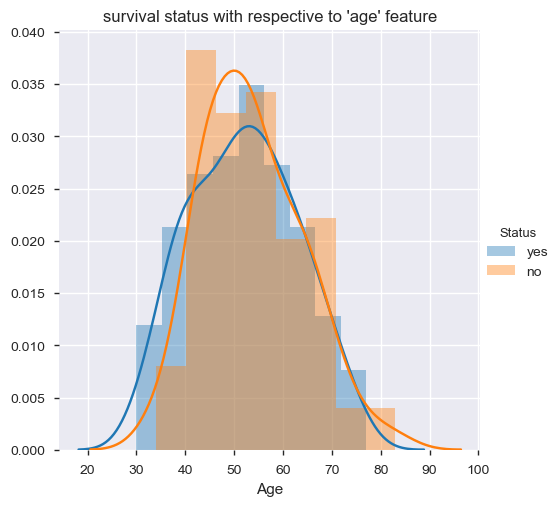

In [17]:
sns.FacetGrid(BCD_df, hue='Status', height=5) \
    .map(sns.distplot, 'Age') \
    .add_legend()
plt.title("survival status with respective to 'age' feature")

Text(0.5, 1.0, 'Plot For Pos_axillary_nodes')

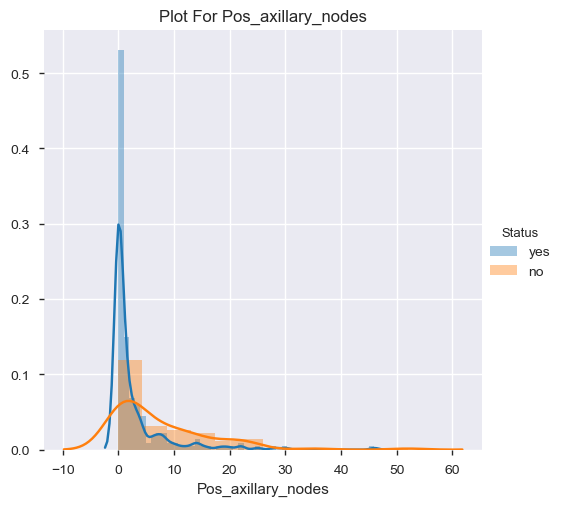

In [18]:
sns.FacetGrid(BCD_df, hue='Status', height=5) \
    .map(sns.distplot, 'Pos_axillary_nodes') \
    .add_legend()
plt.title('Plot For Pos_axillary_nodes')

Text(0.5, 1.0, 'Plot For Years_of_operation')

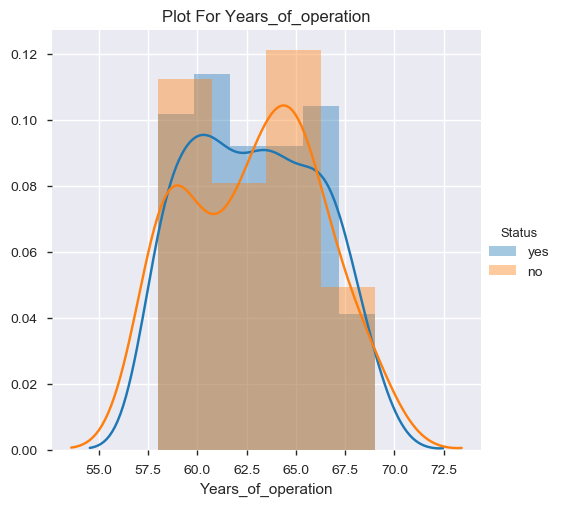

In [19]:
sns.FacetGrid(BCD_df, hue='Status', height=5) \
    .map(sns.distplot, 'Years_of_operation') \
    .add_legend()
plt.title('Plot For Years_of_operation')

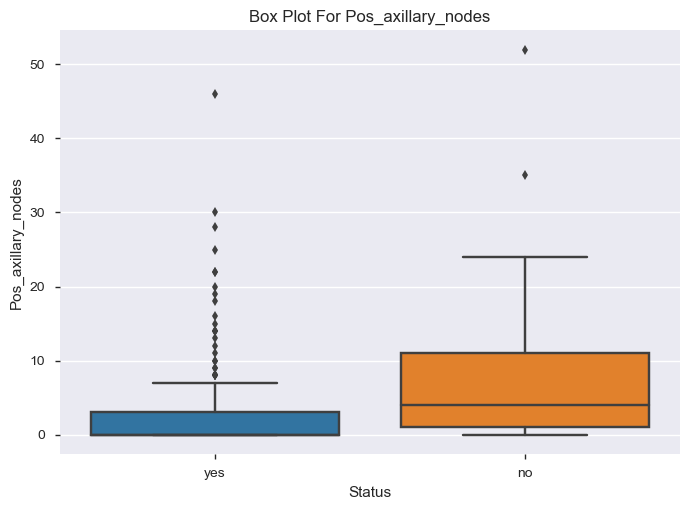

In [21]:
sns.boxplot(x='Status', y = 'Pos_axillary_nodes', data=BCD_df)
plt.title('Box Plot For Pos_axillary_nodes')
plt.show()

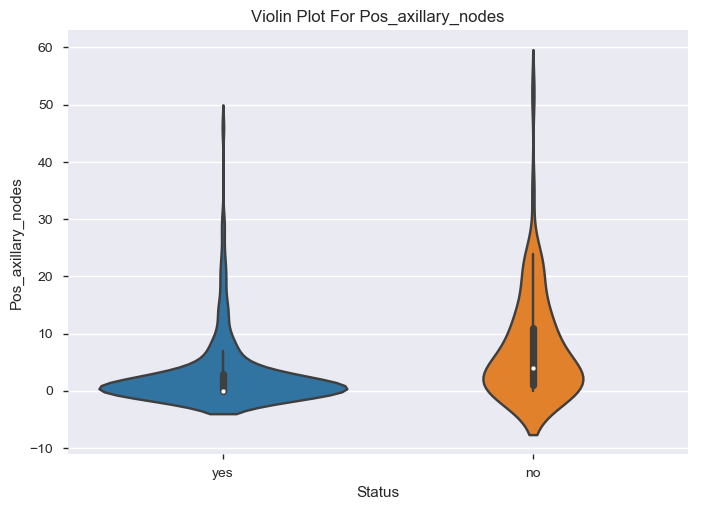

In [22]:
sns.violinplot(x='Status', y='Pos_axillary_nodes', data=BCD_df, size=5)
plt.title('Violin Plot For Pos_axillary_nodes')
plt.show()

## Observation

1. Out of the 3 columns, Pos_auxiliary_nodes has the most significant distinct-distribution among the two Status.
2. For the patients who survived for more than 5yrs, the distribution for Pos_auxiliary_nodes seems to be more densed and centred at 0 whereas for those who lived less than 5yrs, the distrubtion is more varying and has larger values as well.
3. The number of patients that lived more than 5yrs was dominating in the period 1958 - 1963, whereas patients that lived less than 5 yrs dominated in the period 1963 - 1967. Remaining time, both were rougly equal in number.
4. The age of the patient doesn't seem to have any say in whether he'll live beyond 5yrs or not.
5. The distribution of age_of_patients is roughly continuous.

#### 4.2 Finding the best feature for the classification of the survival status?

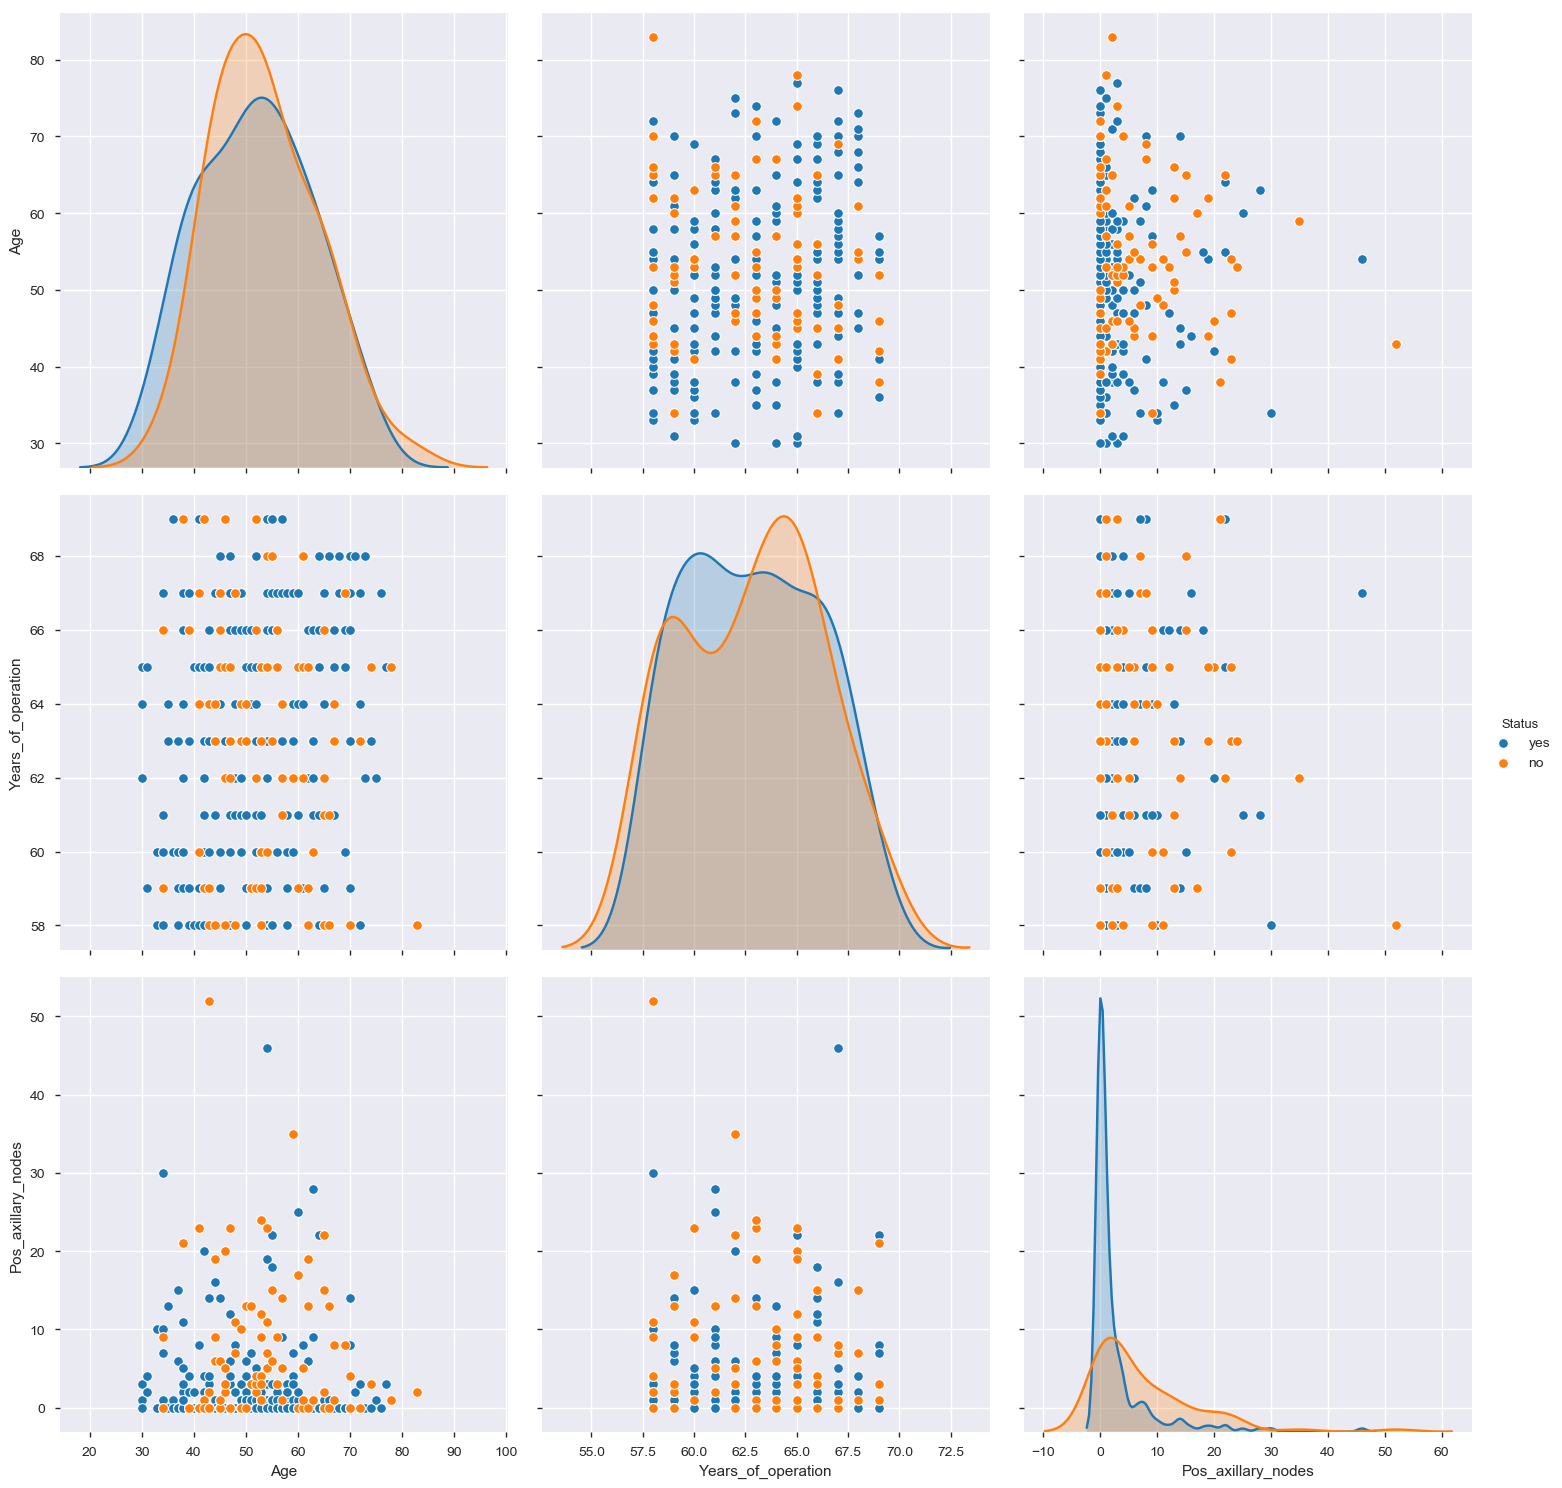

In [28]:
for idx, feature in enumerate(list(BCD_df.columns)[:1]):
  #  print(idx, feature)
    fg = sns.pairplot(BCD_df, hue='Status', height=5)
  #  fg.map(sns.distplot, feature).add_legend()
    plt.show()


- The number of Pos_axillary_nodes of the survivors is highly dense from 0 to 5 as observed.

- Almost 75% of the patients have less than or equal to 5 Pos_axillary_ nodes as we can see in the above plots.

- We get a better job of separating the two status (1 & 2) in the graph Pos_axillary_nodes VS Years_of_operation.

#### 4.3 Co-relation between the Age & Pos_Axillary_nodes from the dataset?

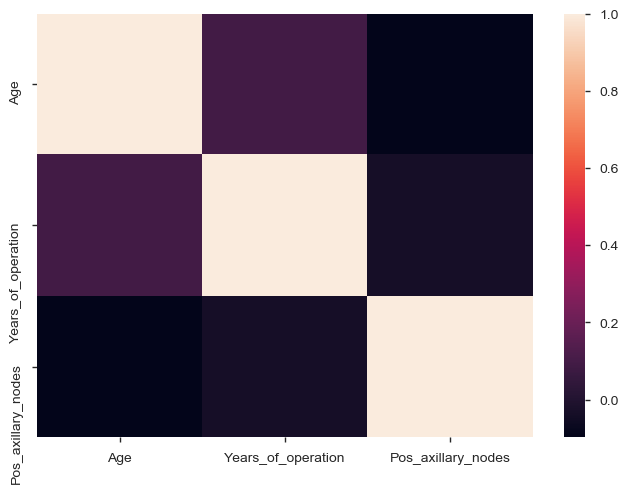

In [41]:
corr = BCD_df.corr(method = 'spearman')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

- Correlation is below 0 and towards negative due to the fact that more number of positive auxiliary nodes refer that the patient has not survived.

## 5. Conclusion

- From this Dataset we can conclude that the majority of operations are performed on people age range between 38 and 68, where most of the points plotted on scatter plot (Operation_year vs Age)

- We can see that there is quite good concentration of data point when Pos_axillary_node is 0.

- We can conclude that large number of operation were done in span of 7 years between 1960 and 1966 (Axil_nodes vs Operation_year)

- Here with this scatter plot we get insight that patients with 0 axil nodes are more likely to survive irrespective to there age. (Axil_node vs Age)

- It is very much less likely to have patients with Pos_axillary_ nodes more than 30.

- Patients who are older than 50 and have Posaxillary_nodes greater than 10 are more likely to dead.

- Most of the operations which were done in year 1960-65 were unsuccessfull as most the patients died within 5 years after opertaion.

- Patients having who have 0 Pos_axillary_nodes are more likely to survive.

- Patients within range of 45-65 and had Pos_axillary_node >= 1 are more likely to die.

- People less than age 40 are more likely to survive though having Pos_axillary_node greater than or equal to 1

- Box plot shows that, the more number of Pos_axillary_nodes, the more patients likely to die

- The patients who had Pos_axillary_nodes from 1 to 24 are the majority of patients who died.

- After taking a look at box plot we can see that, the large number of patients who survived had 0 Pos_axillary_nodes or doesn't had it at all.

- Patients and who died had Pos_axillary_nodes greater than or equal to 1, and as the count of Pos_axillary_nodes increases the repective patient is more likely to die.
### Analysis Conclusion 
- Pos_axillary_nodes is most important feature in this dataset, as who had Pos_axillary_nodes >= 1 those are more likely to die.

- Age is also somewhat important feature of this dataset, because we have seen that patients who aged less than 40 are likely to survive inspite of having Pos_axillary_nodes >= 1